# Modeling and Simulation in Python


Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [1]:
import numpy as np

from sympy import *

init_printing()

This notebook uses SymPy to derive the equations of motion for a springy pendulum and a rigid pendulum.

Here are the symbols we need:

In [2]:
x, y, vx, vy, ax, ay = symbols('x, y, vx, vy, ax, ay')
length0, k, m, g, R, t = symbols('length0, k, m, g, R, t')

We'll use vectors P, V, and A to represent position, velocity and acceleration.  The Vector class in modsim.py doesn't play nicely with SymPy, so I'll use NumPy arrays instead:

In [3]:
P = np.array([x, y])
P

array([x, y], dtype=object)

In [4]:
V = np.array([vx, vy])
V

array([vx, vy], dtype=object)

In [5]:
A = np.array([ax, ay])
A

array([ax, ay], dtype=object)

The only vector operations we need are `mag` and `hat`:

In [6]:
def mag(P):
    return sqrt(P[0]**2 + P[1]**2)

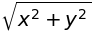

In [7]:
mag(P)

In [8]:
def hat(P):
    return P / mag(P)

In [9]:
hat(P)

array([x/sqrt(x**2 + y**2), y/sqrt(x**2 + y**2)], dtype=object)

For convenience, I'll define intermediate variables like length:

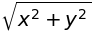

In [10]:
length = mag(P)
length

`f_spring` is the force on the particle due to the spring

In [11]:
f_spring = -k * (length - length0) * hat(P)
f_spring

array([-k*x*(-length0 + sqrt(x**2 + y**2))/sqrt(x**2 + y**2),
       -k*y*(-length0 + sqrt(x**2 + y**2))/sqrt(x**2 + y**2)], dtype=object)

xhat and yhat are unit vectors along the x and y axes: 

In [12]:
xhat = np.array([1, 0])
yhat = np.array([0, 1])

Now I can write force due to gravity as a Vector

In [13]:
f_grav = -m * g * yhat
f_grav

array([0, -g*m], dtype=object)

To write $\sum F = ma$, I'll define the left-hand side and right-hand sides of the equations separately.

In [14]:
lhs = f_spring + f_grav

In [15]:
rhs = m * A

Now I can make two equations, one for each component of F and A:

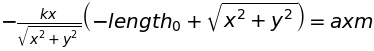

In [16]:
eq1 = Eq(lhs[0], rhs[0])
eq1

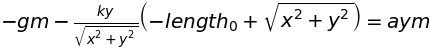

In [17]:
eq2 = Eq(lhs[1], rhs[1])
eq2

Now I want equations that are explicit in ax and ay.  In this case I can get them easily by dividing through by m.  But for the rigid pendulum we will need to use solve, so I want to demonstrate that here.

In [18]:
soln = solve([eq1, eq2], [ax, ay])

Now we can extract the expressions for ax and ay

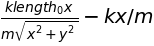

In [19]:
soln[ax]

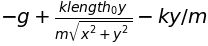

In [20]:
soln[ay]

And we can get SymPy to format the result for LaTeX:

In [21]:
print(latex(soln[ax]))

\frac{k length_{0} x}{m \sqrt{x^{2} + y^{2}}} - \frac{k x}{m}


In [28]:
print(latex(soln[ay]))

- g + \frac{k length_{0} y}{m \sqrt{x^{2} + y^{2}}} - \frac{k y}{m}


Or generate Python code we can paste into a slope function:

In [29]:
print(python(soln[ax]))

k = Symbol('k')
length0 = Symbol('length0')
x = Symbol('x')
m = Symbol('m')
y = Symbol('y')
e = k*length0*x/(m*sqrt(x**2 + y**2)) - k*x/m


In [30]:
print(python(soln[ay]))

g = Symbol('g')
k = Symbol('k')
length0 = Symbol('length0')
y = Symbol('y')
m = Symbol('m')
x = Symbol('x')
e = -g + k*length0*y/(m*sqrt(x**2 + y**2)) - k*y/m


To see these equations run, see pendulum.ipynb

### Rigid pendulum

Solving the rigid pendulum is almost the same, except we need a third equation to represent the geometric constraint.  The simplest form of the constraint is:

$ x^2 + y ^2 = length$

But this equation doesn't involve vx, vy, ax, and ay, so it's not much help.  However, if we take the time derivative of both sides, we get

$ 2 x vx + 2 y vy = 0 $

And if we take the time derivative one more time (and divide through by 2), we get

$ x ax + y ay + vx^2 + vy^2 = 0 $

And that's just what we need.

In [31]:
eq3 = Eq(x*ax + y*ay + vx**2 + vy**2, 0)
eq3

Now we can represent the force due to tension as a vector with unknown magnitude, R, and direction opposite P. 

In [32]:
f_tension = -R * hat(P)

Again, we can write $\sum F = ma$

In [33]:
lhs = f_grav + f_tension

In [34]:
rhs = m * A

And make one equation for each dimension:

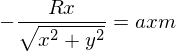

In [35]:
eq4 = Eq(lhs[0], rhs[0])
eq4

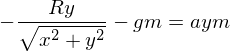

In [36]:
eq5 = Eq(lhs[1], rhs[1])
eq5

Now we have three equations in three unknowns:

In [37]:
soln = solve([eq3, eq4, eq5], [ax, ay, R])

And we can get explicit expressions for ax and ay

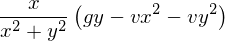

In [38]:
soln[ax]

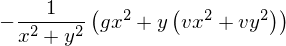

In [39]:
soln[ay]

Again, we can get the results in LaTeX or Python.

In [40]:
print(latex(soln[ax]))

\frac{x}{x^{2} + y^{2}} \left(g y - vx^{2} - vy^{2}\right)


In [41]:
print(latex(soln[ay]))

- \frac{1}{x^{2} + y^{2}} \left(g x^{2} + y \left(vx^{2} + vy^{2}\right)\right)


To see these equations run, see pendulum2.ipynb

In [42]:
print(python(soln[ax]))

x = Symbol('x')
g = Symbol('g')
y = Symbol('y')
vx = Symbol('vx')
vy = Symbol('vy')
e = x*(g*y - vx**2 - vy**2)/(x**2 + y**2)


In [43]:
print(python(soln[ay]))

g = Symbol('g')
x = Symbol('x')
y = Symbol('y')
vx = Symbol('vx')
vy = Symbol('vy')
e = -(g*x**2 + y*(vx**2 + vy**2))/(x**2 + y**2)
